   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Ridge Regression: MSE = 0.5559, R2 = 0.5758
Lasso Regression: MSE = 0.6796, R2 = 0.4814
ElasticNet Regression: MSE = 0.6359, R2 = 0.5148


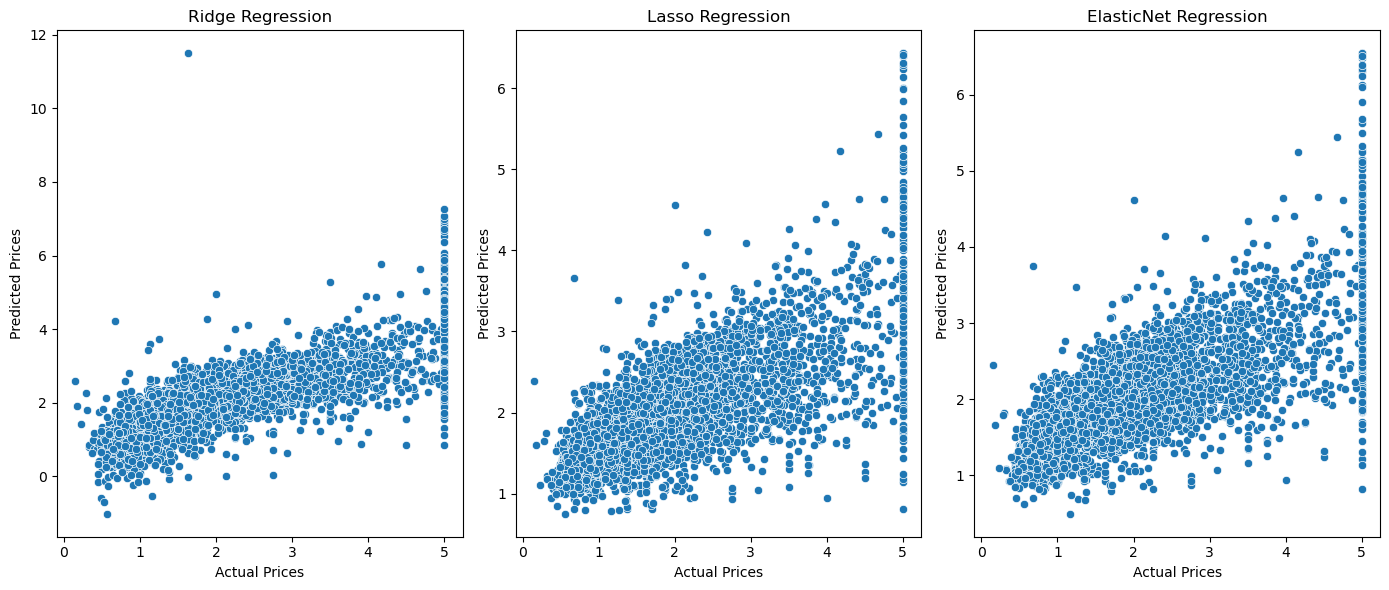

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
housing = fetch_california_housing()

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Display the first few rows of the dataset
print(data.head())

# Split the data into features and target
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_enet = elastic_net.predict(X_test_scaled)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_enet = mean_squared_error(y_test, y_pred_enet)

r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_enet = r2_score(y_test, y_pred_enet)

print(f"Ridge Regression: MSE = {mse_ridge:.4f}, R2 = {r2_ridge:.4f}")
print(f"Lasso Regression: MSE = {mse_lasso:.4f}, R2 = {r2_lasso:.4f}")
print(f"ElasticNet Regression: MSE = {mse_enet:.4f}, R2 = {r2_enet:.4f}")

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Regression')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_enet)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('ElasticNet Regression')

plt.tight_layout()
plt.show()
